# SimpleHouseRad notebook example

In this example, the usage of the model "SimpleHouseRad-v0" is demonstrated.

First, we import Energym and create the simulation environment by specifying the model, a weather file and the number of simulation days.

In [1]:
import energym

weather = "CH_BS_Basel"
env = energym.make("SimpleHouseRad-v0", weather=weather, simulation_days=20)

The control inputs can be inspected using the `get_inputs_names()` method.

In [2]:
inputs = env.get_inputs_names()
print(inputs)

['u']


To run the simulation, a number of steps is specified (here 288 steps per day for 10 days), a control input is specified and passed to the simulation model with the `step()` method. To generate some plots later on, we save all the outputs in lists.

In [3]:
from scipy import signal

steps = 288*10
out_list = []
outputs = env.get_output()
controls = []
hour = 0
for i in range(steps):
    control = {}
    control['u'] = [0.5*(signal.square(0.1*i)+1.0)]
    controls +=[ {p:control[p][0] for p in control} ]
    outputs = env.step(control)
    _,hour,_,_ = env.get_date()
    out_list.append(outputs)

[OK] %s
[WARNING] %s


Since the outputs are given as dictionaries and are collected in lists, we can simply load them as a pandas.DataFrame.

In [4]:
import pandas as pd
out_df = pd.DataFrame(out_list)

In [5]:
out_df

,TOut.T,heaPum.COP,heaPum.COPCar,heaPum.P,heaPum.QCon_flow,heaPum.QEva_flow,heaPum.TConAct,heaPum.TEvaAct,preHea.Q_flow,rad.Q_flow,...,sunRad.y,temRet.T,temRoo.T,temSup.T,weaBus.HDifHor,weaBus.HDirNor,weaBus.HGloHor,weaBus.HHorIR,y,time
0,273.040697,3.534267,7.437804,5000.0,1.767134e+04,-1.267134e+04,321.988855,278.698008,0.0,-17920.641869,...,0.0,316.440754,293.390546,320.572635,0.0,0.0,0.0,198.356554,293.390546,300.0
1,273.050842,3.534640,7.438588,5000.0,1.767320e+04,-1.267320e+04,321.988496,278.702258,0.0,-17681.274614,...,0.0,316.348049,293.612518,320.574636,0.0,0.0,0.0,198.314931,293.612518,600.0
2,273.060017,3.533138,7.435427,5000.0,1.766569e+04,-1.266569e+04,322.012420,278.704562,0.0,-17516.873945,...,0.0,316.379873,293.825719,320.599010,0.0,0.0,0.0,198.276953,293.825719,900.0
3,273.067805,3.529085,7.426898,5000.0,1.764542e+04,-1.264542e+04,322.077806,278.711408,0.0,-17396.958556,...,0.0,316.455622,294.031841,320.665911,0.0,0.0,0.0,198.244444,294.031841,1200.0
4,273.073788,3.523458,7.415057,5000.0,1.761729e+04,-1.261729e+04,322.169078,278.721120,0.0,-17306.466774,...,0.0,316.558271,294.232023,320.759368,0.0,0.0,0.0,198.219227,294.232023,1500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,278.540000,3.641306,7.663066,0.0,-1.323489e-23,1.323489e-23,325.645451,283.150000,0.0,-840.945080,...,0.0,321.767688,297.376704,325.645098,0.0,0.0,0.0,236.600000,297.376704,862800.0
2876,278.540000,3.641306,7.663066,0.0,-1.323489e-23,1.323489e-23,325.645451,283.150000,0.0,-801.500216,...,0.0,321.767688,297.126147,325.645098,0.0,0.0,0.0,236.962500,297.126147,863100.0
2877,278.540000,3.641306,7.663066,0.0,-1.323489e-23,1.323489e-23,325.645451,283.150000,0.0,-768.308001,...,0.0,321.767688,296.878184,325.645098,0.0,0.0,0.0,237.325000,296.878184,863400.0
2878,278.540000,3.641306,7.663066,0.0,-1.323489e-23,1.323489e-23,325.645451,283.150000,0.0,-740.042078,...,0.0,321.767688,296.632943,325.645098,0.0,0.0,0.0,237.687500,296.632943,863700.0


To generate plots, we can directly get the data from the DataFrames, by using the key names. Displayed are the room temperature, the supply temperature and the return temperature, as well as the external temperature, and the heat pump energy.

<IPython.core.display.Javascript object>


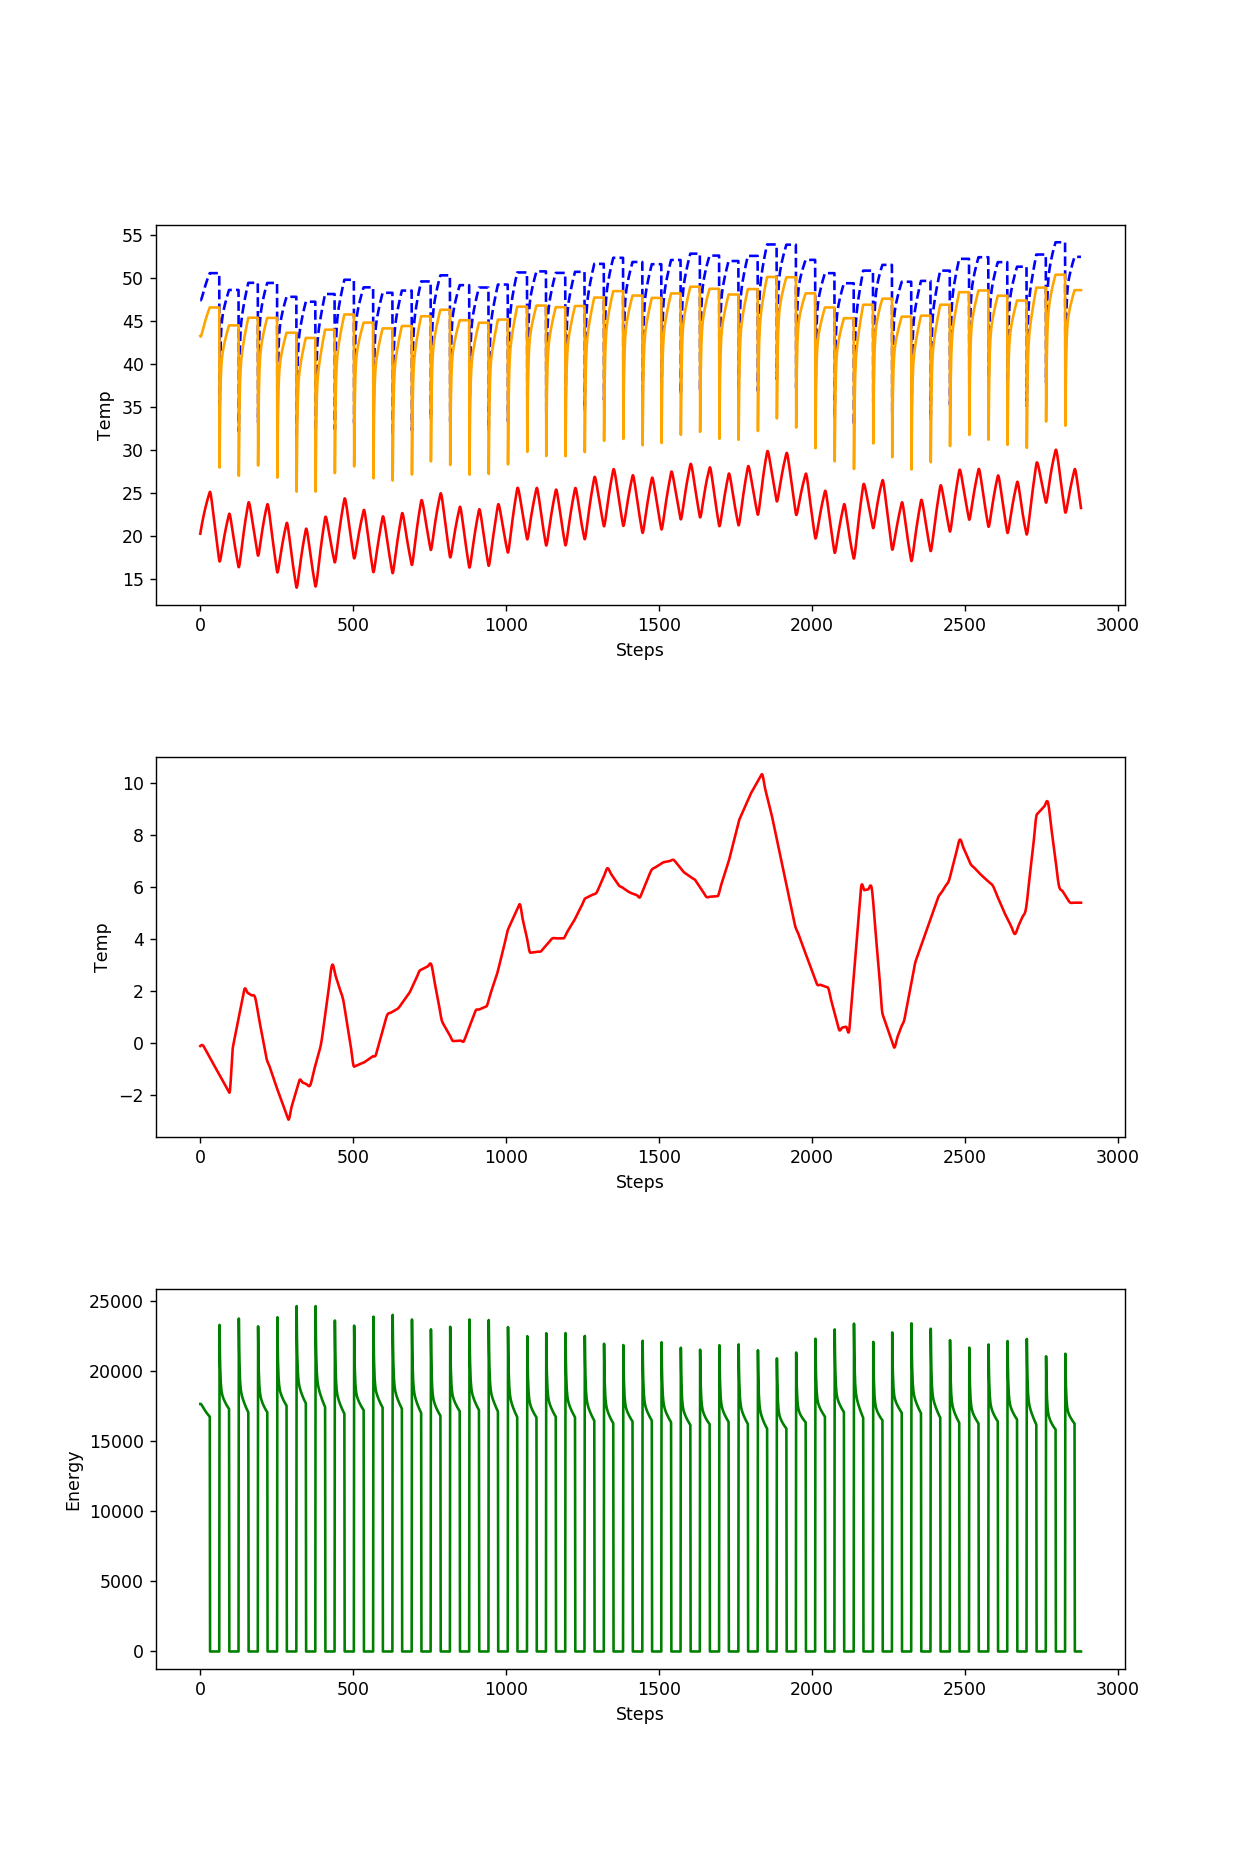

In [6]:
import matplotlib.pyplot as plt
%matplotlib notebook

f, (ax1,ax2,ax3) = plt.subplots(3,figsize=(10,15))#


ax1.plot(out_df['temRoo.T']-273.15, 'r')
ax1.plot(out_df['temSup.T']-273.15, 'b--')
ax1.plot(out_df['temRet.T']-273.15, 'orange')
ax1.set_ylabel('Temp')
ax1.set_xlabel('Steps')

ax2.plot(out_df['TOut.T']-273.15, 'r')
ax2.set_ylabel('Temp')
ax2.set_xlabel('Steps')

ax3.plot(out_df['heaPum.QCon_flow'], 'g')
ax3.set_ylabel('Energy')
ax3.set_xlabel('Steps')

plt.subplots_adjust(hspace=0.4)

plt.show()

To end the simulation, the `close()` method is called. It deletes files that were produced during the simulation and stores some information about the simulation in the *energym_runs* folder.

In [7]:
env.close()

Folder could not be removed.
